In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
#Get the month and year
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
#Group items counted by month-year
group_by_month = df.groupby('month_year').agg({'Member_number':'nunique'}).reset_index()
#Sort the month-year by time order
group_by_month = group_by_month.sort_values(by = ['month_year'])
group_by_month['month_year'] = group_by_month['month_year'].astype('str')
group_by_month.head()

,month_year,Member_number
0,2014-01,605
1,2014-02,620
2,2014-03,608
3,2014-04,608
4,2014-05,650


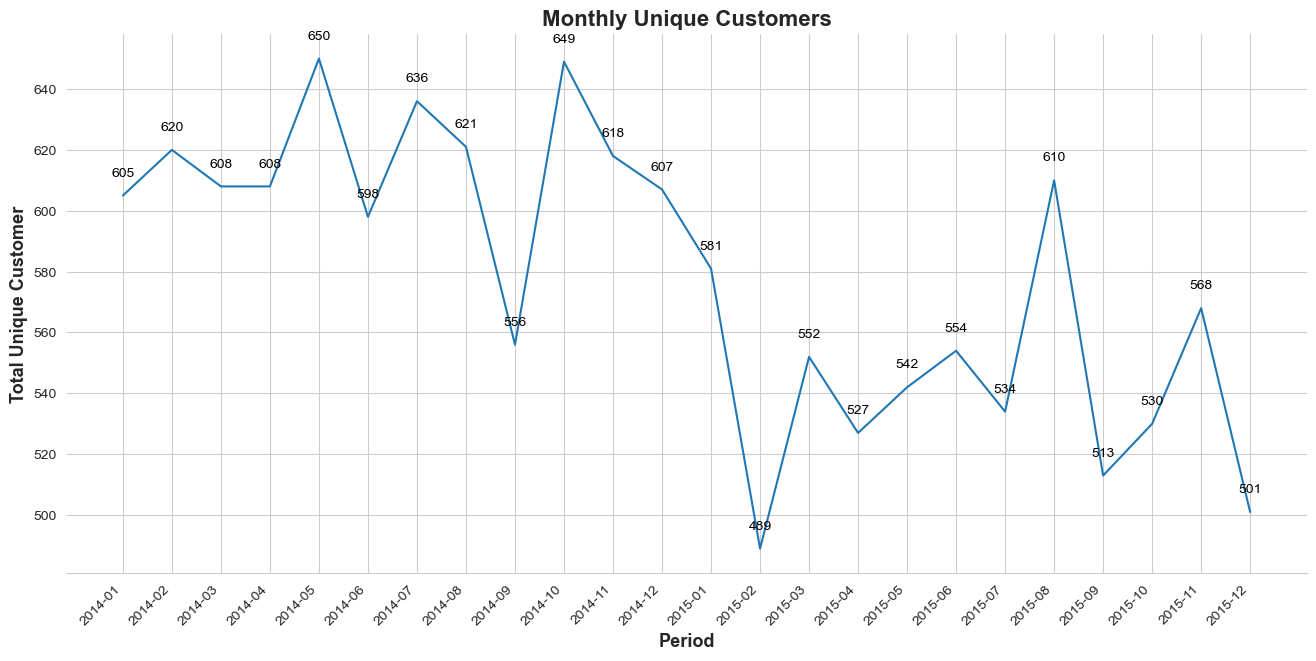

In [4]:
#Create subplot
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(16,7))
#Create lineplot
chart=sns.lineplot(x=group_by_month['month_year'], y=group_by_month['Member_number'],ax=ax)
sns.despine(left=True)
#Customize chart
chart.set_xlabel('Period',weight='bold',fontsize=13)
chart.set_ylabel('Total Unique Customer', weight='bold',fontsize=13)
chart.set_title('Monthly Unique Customers',weight='bold',fontsize=16)
chart.set_xticklabels(group_by_month['month_year'], rotation = 45, ha="right")

ymin, ymax = ax.get_ylim()
bonus = (ymax - ymin)/28# still hard coded bonus but scales with the data
for x, y, name in zip(group_by_month['month_year'], group_by_month['Member_number'], group_by_month['Member_number'].astype('str')):
    ax.text(x, y + bonus, name, color = 'black', ha='center')

In [5]:
#Count and group by category
category = df.groupby('itemDescription').agg({'Member_number':'count'}).rename(columns={'Member_number':'total sale'}).reset_index()
#Get 10 first categories
category2 = category.sort_values(by=['total sale'], ascending = False).head(10)
category2.head()

,itemDescription,total sale
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334


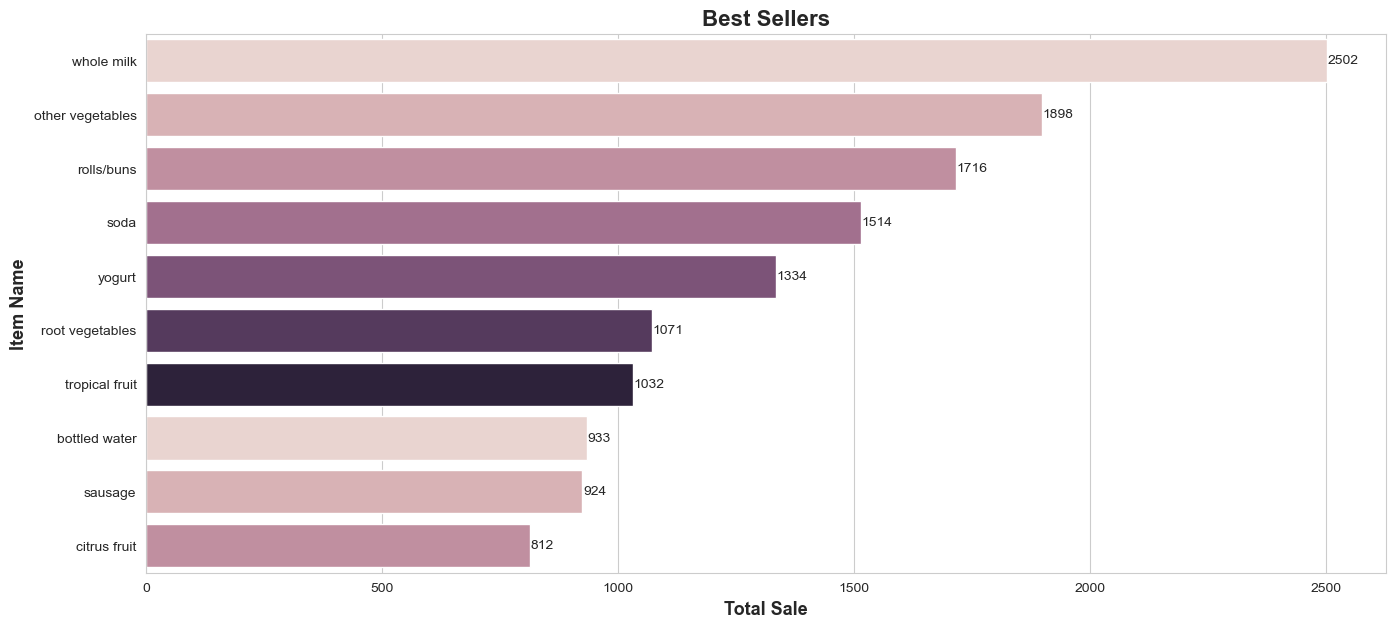

In [6]:
#Horizontal barchart
#Create subplot
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize=(16,7))
#Create barplot
chart2 = sns.barplot(x=category2['total sale'],y=category2['itemDescription'], palette=sns.cubehelix_palette(len(x)))
#Customize chart
chart2.set_xlabel('Total Sale',weight='bold',fontsize=13)
chart2.set_ylabel('Item Name', weight='bold',fontsize=13)
chart2.set_title('Best Sellers',weight='bold',fontsize=16)
#Value number on chart: https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

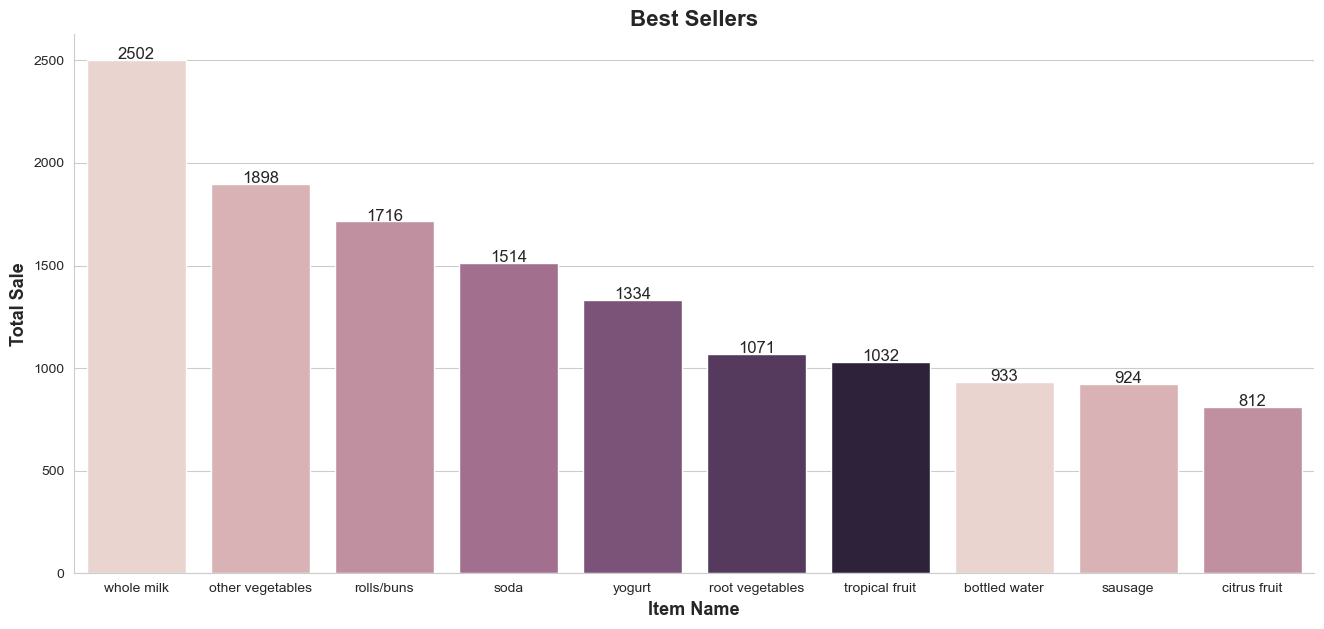

In [7]:
#Vertical Barchart
#Create subplot
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize=(16,7))
#Create barplot
chart2 = sns.barplot(x=category2['itemDescription'],y=category2['total sale'], palette=sns.cubehelix_palette(len(x)))
#Customize chart
chart2.set_ylabel('Total Sale',weight='bold',fontsize=13)
chart2.set_xlabel('Item Name', weight='bold',fontsize=13)
chart2.set_title('Best Sellers',weight='bold',fontsize=16)
sns.despine()
#Value number on chart
for p in ax.patches: 
    height =p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height),
        ha="center", fontsize=12)

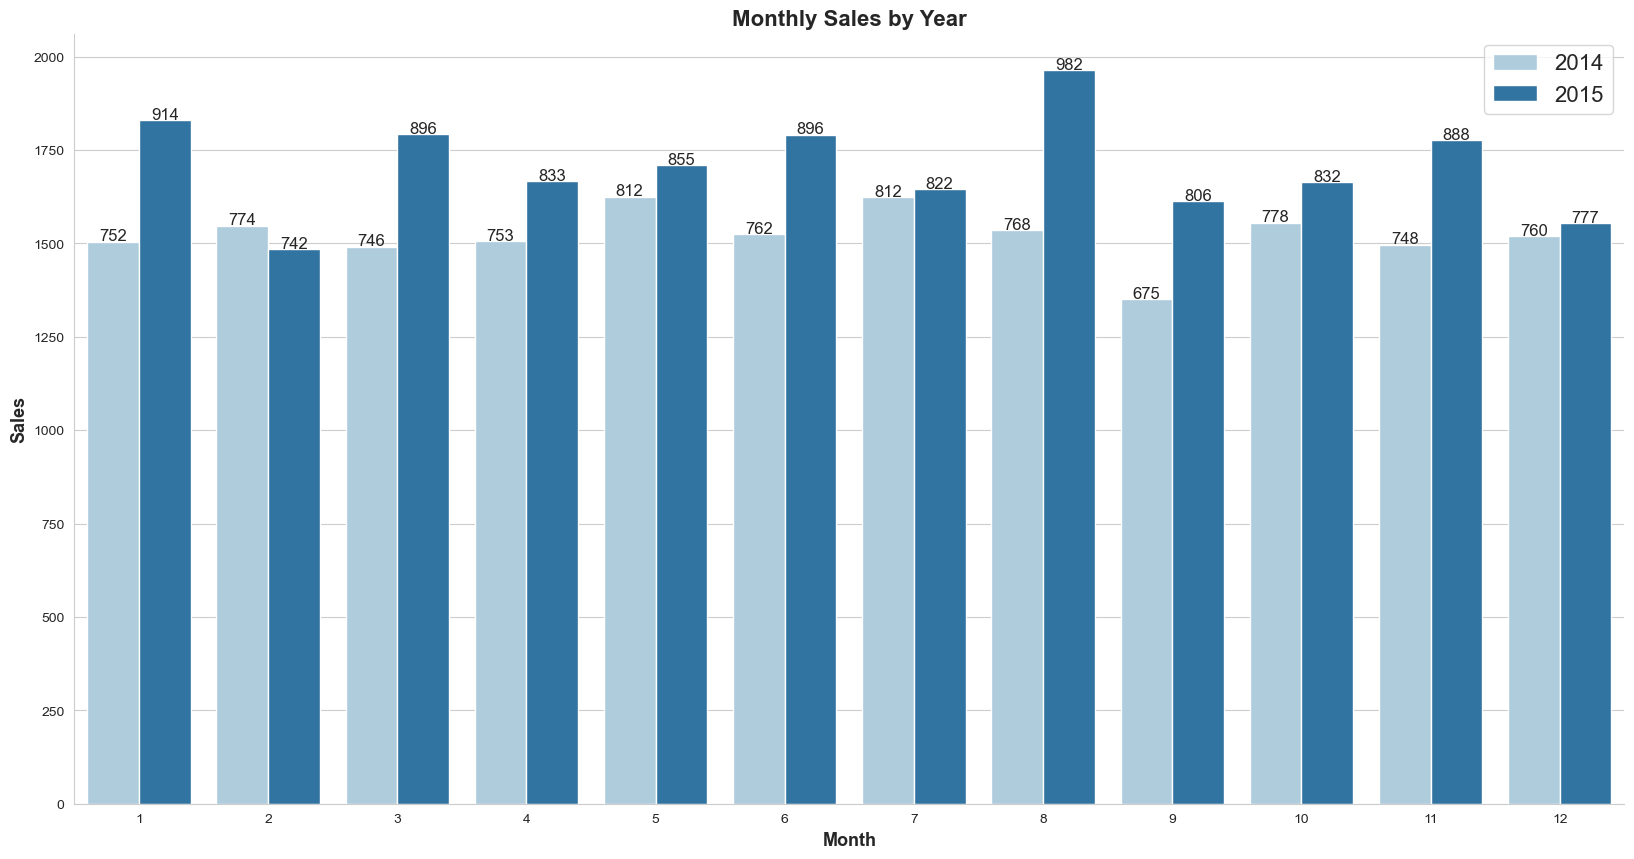

In [8]:
#transform dataset
month_sale = df.groupby(['month','year']).agg({'Member_number':'count'}).rename(columns={'Member_number':'Sales'}).reset_index()
#Create subplot
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize=(20,10))
#Create barplot
chart3 = sns.barplot(data=month_sale, x='month',y='Sales', hue ='year', palette = 'Paired')
#Customize chart
chart3.set_ylabel('Sales',weight='bold',fontsize=13)
chart3.set_xlabel('Month', weight='bold',fontsize=13)
chart3.set_title('Monthly Sales by Year',weight='bold',fontsize=16)
chart3.legend(loc='upper right', fontsize =16)
sns.despine(left = False)

#Create value label on bar chart
totals = month_sale['month'].value_counts()
n_hues = month_sale['year'].unique().size

temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height/t),
        ha="center", fontsize=12)

Text(0, 0.5, 'Number of Customers')

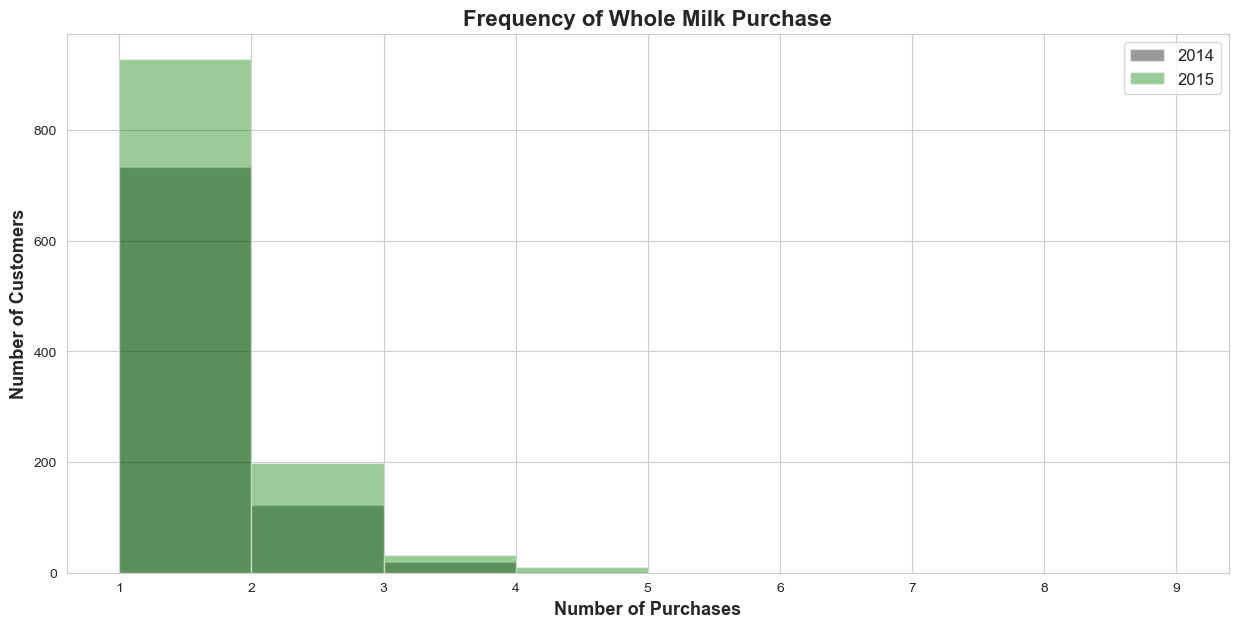

In [9]:
#Data transformation
whole_milk = df[['Member_number','itemDescription','year']][df['itemDescription'] == 'whole milk'].groupby(['Member_number','year']).agg({'itemDescription':'count'}).reset_index()
#Create subplot
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize =(15,7))
#Create displot
a = whole_milk[whole_milk.year == 2014]
sns.distplot(a['itemDescription'],hist = True,kde = False, label='2014',bins= range(1,10),color = 'black' )
a = whole_milk[whole_milk.year == 2015]
sns.distplot(a['itemDescription'],hist = True,kde = False, label='2015',bins=range(1,10), color = 'green')
#Plot formatting
ax.set_xticks(range(1,10))
plt.legend(prop={'size': 12})
plt.title('Frequency of Whole Milk Purchase', weight='bold',fontsize = 16)
plt.xlabel('Number of Purchases',weight = 'bold',fontsize = 13)
plt.ylabel('Number of Customers',weight = 'bold',fontsize = 13)

In [10]:
#Get the list of top 10 categories
list = category2.itemDescription.to_list()
#Get top 10 vs the rest
category_by_year = df.groupby(['itemDescription','year']).agg({'Member_number':'count'}).rename(columns={'Member_number':'total sale'}).reset_index()
category_by_year['classification']= np.where(category_by_year.itemDescription.isin(list),'Top 10', 'Not Top 10')
top10_vs_therest = category_by_year.groupby(['classification','year']).agg({'total sale':'sum'}).reset_index()
top10_vs_therest

,classification,year,total sale
0,Not Top 10,2014,12331
1,Not Top 10,2015,12698
2,Top 10,2014,5946
3,Top 10,2015,7790


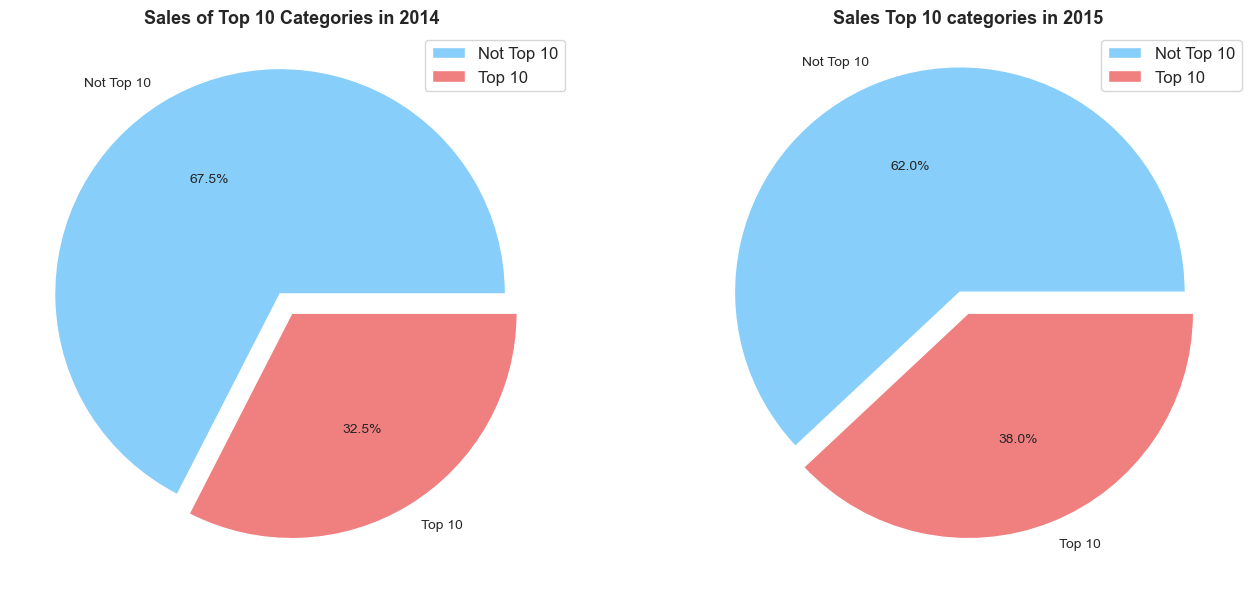

In [11]:
#Create subplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,10))
#select color for each sections of
colors = ['lightskyblue', 'lightcoral']
#Plot the 1st pie
labels = labels=top10_vs_therest[(top10_vs_therest.year == 2014)]['classification']
explode_list = [0.1, 0]
values = top10_vs_therest[(top10_vs_therest.year == 2014)]['total sale']
ax1.pie(values,labels = labels,colors = colors, explode = explode_list,autopct = '%1.1f%%') 
ax1.set_title('Sales of Top 10 Categories in 2014', fontsize = 13, weight = 'bold')
ax1.legend(prop={'size': 12}, loc = 'upper right')

#Plot the 2nd pie
labels2 = labels=top10_vs_therest[(top10_vs_therest.year == 2015)]['classification']
values2 = top10_vs_therest[(top10_vs_therest.year == 2015)]['total sale']
ax2.pie(values2,labels = labels2,colors = colors, explode = explode_list, autopct = '%1.1f%%') 
ax2.set_title('Sales Top 10 categories in 2015', fontsize = 13, weight = 'bold')
ax2.legend(prop={'size': 12})

# plt.title('Top 10 Sales in 2014 vs 2015', weight = 'bold', fontsize = 15)
plt.show()

In [12]:
#Extract day of week from date time
import datetime 
import calendar 
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%d-%m-%Y').weekday() 
    return (calendar.day_name[born]) 

df['day'] = df['Date'].apply(lambda x: findDay(x))
#Group the data by day
df_day = df.groupby(['day','itemDescription']).agg({'Member_number':'count'}).rename(columns={'Member_number':'Sales'}).reset_index()
dows = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day['day'] = pd.Categorical(df_day['day'], categories=dows, ordered=True)
df_day2 = df_day.sort_values('day')
df_day2.head()


,day,itemDescription,Sales
318,Monday,white wine,26
217,Monday,frozen dessert,17
216,Monday,frozen chicken,2
215,Monday,frankfurter,80
214,Monday,flower soil/fertilizer,3


Text(0.5, 1.0, 'Sales by Day of Week')

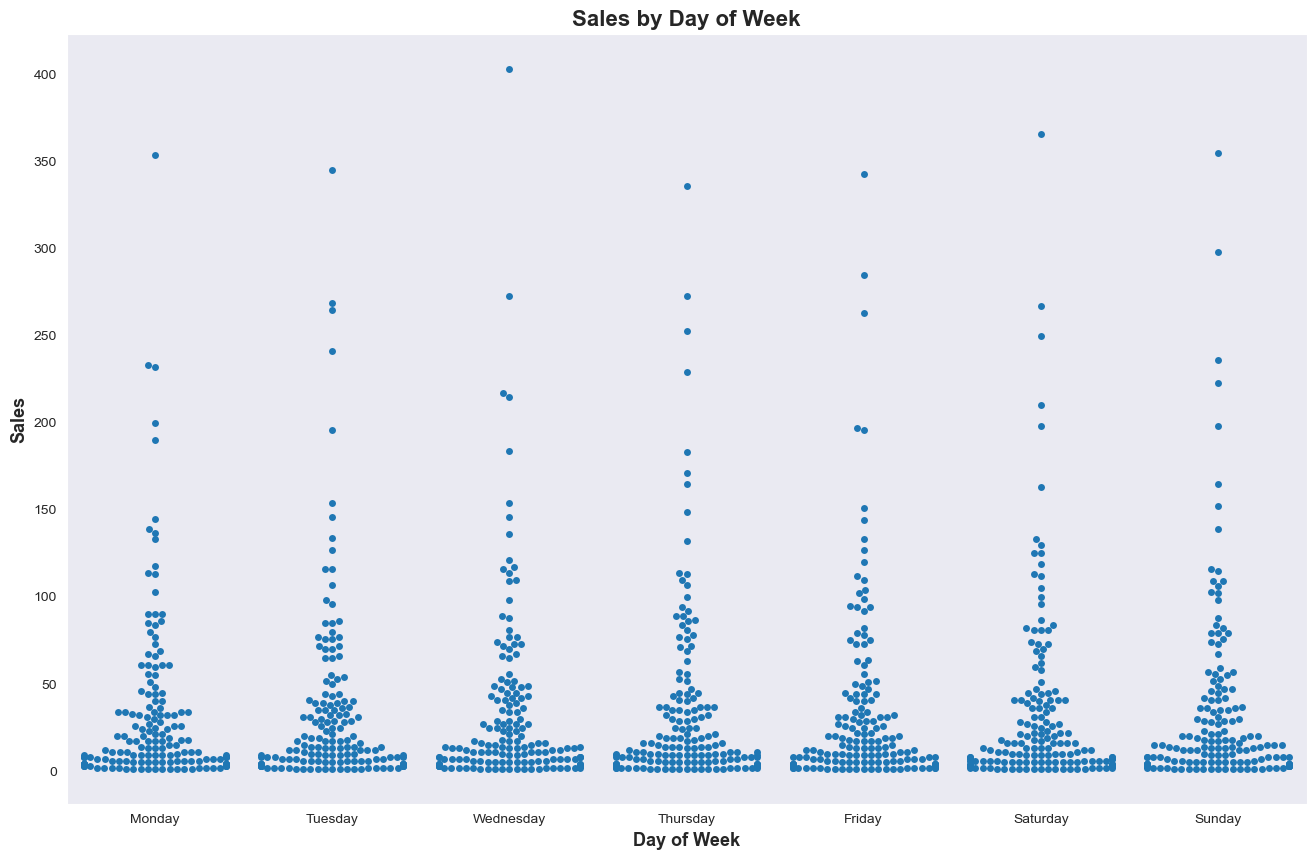

In [13]:
sns.set_style('dark') #set theme
#Create subplot
fig,ax = plt.subplots(figsize=(16,10))
#Plot the swarm
chart5 = sns.swarmplot(x="day", y="Sales", data=df_day2)
#Label
chart5.set_ylabel('Sales',weight='bold',fontsize=13)
chart5.set_xlabel('Day of Week', weight='bold',fontsize=13)
chart5.set_title('Sales by Day of Week',weight='bold',fontsize=16)